# ACM Uniandes.
## Taller 1 Ciencia de datos y Machine learning - introducción a ambiente local y exploración de datos
__________________

## Contenido del taller
0. Requerimientos de software y configuración de ambiente de desarrollo

### Parte 1 - Exploración de datos. 
1. Importando datos.
   - 1.1 Datos desde url.
   - 1.2 Datos desde directorio local.
   - 1.3 Datos desde BigQuery.
2. Overview de estadísticas descriptivas de los datos.
3. Análisis de patrones en variables individuales numéricas. 
4. Análisis de patrones en variables nominales usando gráficos de caja (boxplot).
5. Análisis de correlación usando heatmaps. 
6. Pandas profiling. 

### Parte 2 - Limpieza/transformación de datos.
7. Identificación y manejo de datos nulos (missing values). 
8. Estandarización de datos. 
9. Normalización de datos. 
10. Manejo de datos atípicos
10. Binning datos.

____________

## 0. Requerimientos de software y configuración de ambiente de desarrollo 
  1. Descargar [Anaconda Individual Open Source Edition]("https://www.anaconda.com/products/individual"). Anaconda es una distribución de código abierto de Python y R que ayuda a crear ambientes de desarrollo para proyectos de data science y machine learning.
  2. Configuración de ambiente virtual de python. (opcional):  
     2.1 Actualice pip si lo tiene desactualizado corriendo este comando en la terminal  
        ```
        pip3 install --upgrade pip  

        ```  
     2.2 Instale el paquete ```virtualenv``` el cual le permite crear ambientes virtuales dentro de directorios de su máquina local: 
        ```
        pip3 install virtualenv  

        ```  
     2.3 Cree un directorio en el que maneje todos sus experimentos de ciencia de datos y machine learning.  
     2.4 Navegue a ese directorio mediante la terminal y dentro de ese directorio cree un ambiente virtual de python: 
        ```
        python3 -m virtualenv env

        ``` 
        Ahora tiene creado en su directorio un ambiente virtual llamado ```env``` en el cual se manejaran aisladamente las dependencias de sus proyectos en ese directorio. (Si desea consultar más acerca de los ambientes virtuales en python puede consultar este [link](https://realpython.com/python-virtual-environments-a-primer/)).  
        
        

## 1. Importación de datos.

En python se pueden importar datos de muchas manera: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pltlab
import numpy as np
import seaborn as sns
import pandas_profiling

import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage

from pandas_profiling import ProfileReport


In [2]:
# 1. Importación desde un archivo local:

data_housing = pd.read_csv("data_housing.csv")

# 2. Importación desde una url pública:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
data_cars = pd.read_csv(url)

# 3. Importación desde un dataset público de Big Query:

## Necesitan crear unas credenciales del API de GCP primero... 
credentials, your_project_id = google.auth.default(
    scopes=["https://www.googleapis.com/auth/cloud-platform"]
)
bqclient = bigquery.Client(credentials=credentials, project=your_project_id,)
bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=credentials)

# Download query results.
query_string = """
SELECT
*
FROM `bigquery-public-data.new_york.tree_census_2015`
LIMIT 1000
"""

data_ny_trees = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(bqstorage_client=bqstorageclient)
)


### <em>Parentesis de GCP</em>
Para poder usar algún dataset de la base de datos **publica** de GCP tienen primero que activar el API de BigQuery en sus cuentas de GCP y luego configurar las credenciales locales en su pc (tienen que crear un par de variables de entorno). En este [link]("https://cloud.google.com/bigquery/docs/bigquery-storage-python-pandas?hl=es-419") encuentran todo el proceso. 

________

En este caso usaremos las 3 fuentes de datos para mostrar distintos tipos de transformaciones posibles que se pueden hacer en fuentes de datos dependiendo de su naturaleza

In [3]:
data_housing.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data_cars.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
data_ny_trees.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,107941,103670,2015-08-01,5,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,75,31,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1009700,New York,40.748571,-73.999960,984261.0361,212001.1046
1,111522,103671,2015-08-02,12,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,75,31,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1009700,New York,40.750113,-74.000337,984156.5376,212563.0290
2,111470,103668,2015-08-02,0,6,OnCurb,Stump,,,,...,75,31,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1009700,New York,40.749737,-74.002517,983552.4810,212426.2458
3,111471,103668,2015-08-02,0,8,OnCurb,Stump,,,,...,75,31,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1009700,New York,40.749902,-74.002398,983585.6280,212486.0770
4,61044,103654,2015-07-11,6,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,75,27,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1009700,New York,40.749815,-73.995802,985413.0869,212454.4974


## 2. Overview de estadísticas descriptivas de los datos

In [6]:
data_cars.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
# Numero de filas y número de columnas.
print(f"La fuente de datos de automóviles tiene: {len(data_cars)} datos.\n")
columns = data_cars.columns
print(f"Columnas: ({len(columns)}) {list(columns)}\n")
print(f"Tipos de datos de cada columna:\n{data_cars.dtypes}")

La fuente de datos de automóviles tiene: 201 datos.

Columnas: (29) ['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned', 'diesel', 'gas']

Tipos de datos de cada columna:
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore  

In [8]:
print('Estadísticas de los datos:\n')
data_cars.describe()

Estadísticas de los datos:



,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [9]:
print("Valores distintos en la columna 'width': ")
data_cars['bore'].value_counts()

Valores distintos en la columna 'width': 


3.620000    23
3.190000    20
3.150000    15
2.970000    12
3.030000    10
3.460000     9
3.780000     8
3.310000     8
3.430000     8
2.910000     7
3.270000     7
3.540000     6
3.580000     6
3.390000     6
3.050000     6
3.700000     5
3.010000     5
3.329751     4
3.350000     4
3.590000     3
3.740000     3
3.170000     3
3.470000     2
3.630000     2
3.330000     2
3.240000     2
3.800000     2
3.500000     2
3.600000     1
2.990000     1
3.080000     1
3.610000     1
2.680000     1
3.340000     1
3.940000     1
3.130000     1
2.540000     1
2.920000     1
3.760000     1
Name: bore, dtype: int64

## 3. Análisis de patrones en variables individuales numéricas. 

### 3.1 Histogramas de variables numéricas.
Los histogramas son útiles para conocer si alguna variable se ajusta a un tipo específico de distribución, esto es de interés sobre todo en análisis estadísticos en los que dependiendo de la distribución de los datos puedo hacer ciertos supuestos que benefician mis análisis (e.g. dist exponencial, normal, uniforme, poisson)

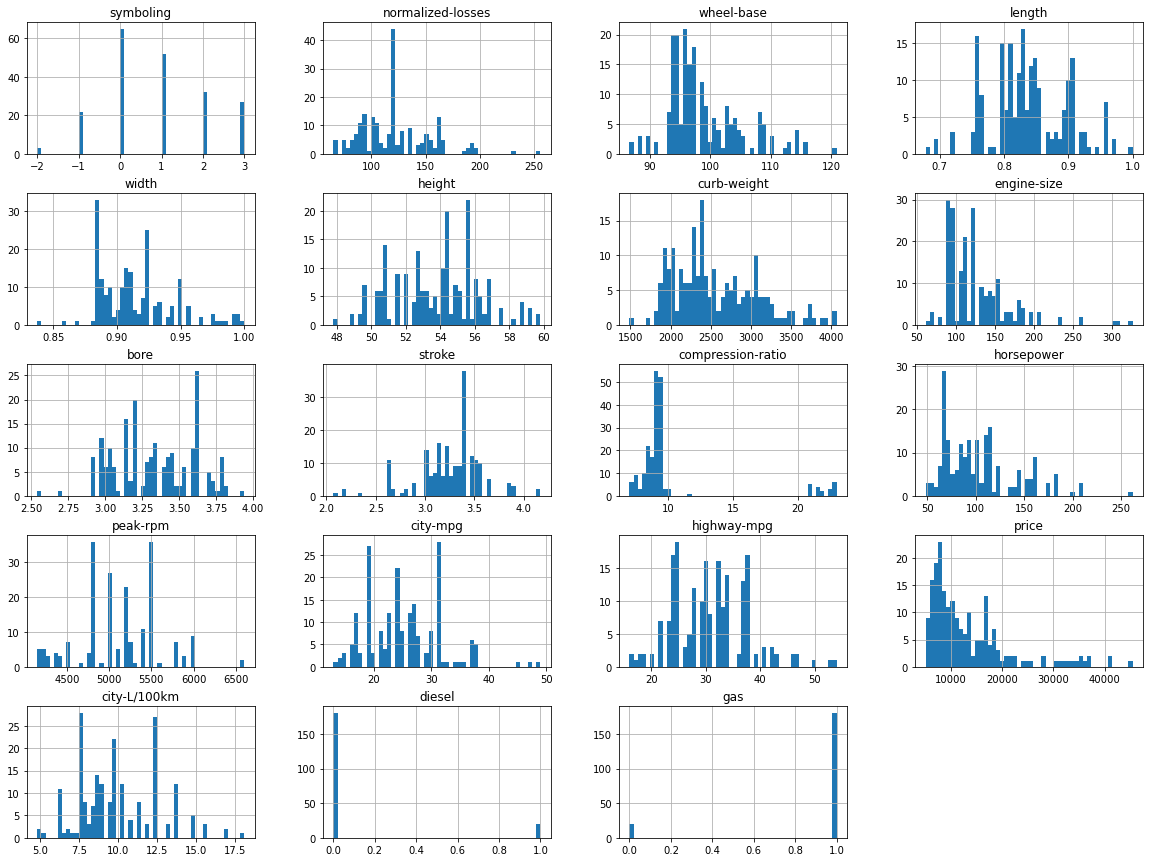

In [10]:
data_cars.hist(bins=50, figsize=(20,15)) 
plt.show()

### 3.2 Gráficos de tendencia. 
Para modelos de regresión son muy útiles para tener una apreciación de la relación entre una variable independiente con la variable objetivo, en este caso queremos ver la relación (directa o inversa) entre las variables númericas del conjunto de datos y el precio de los carros.

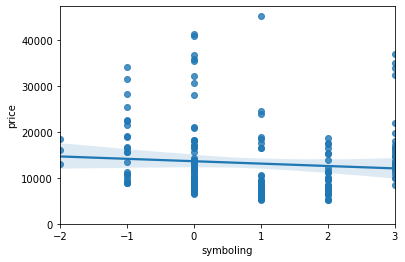

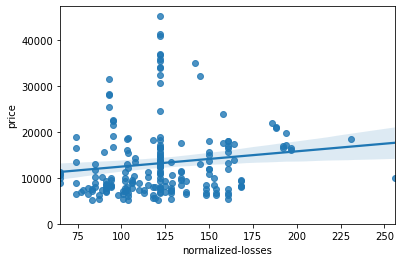

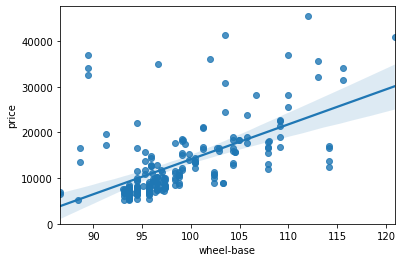

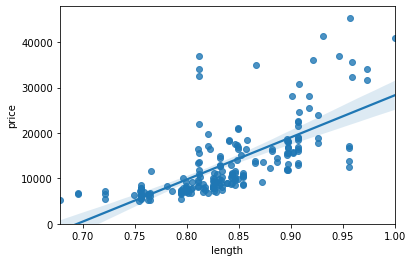

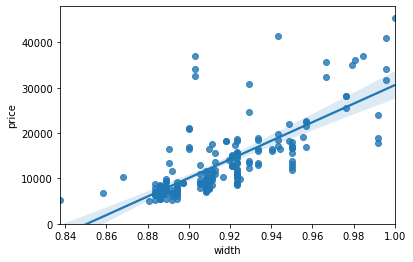

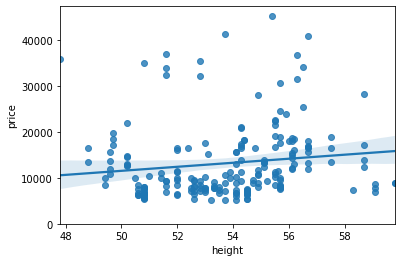

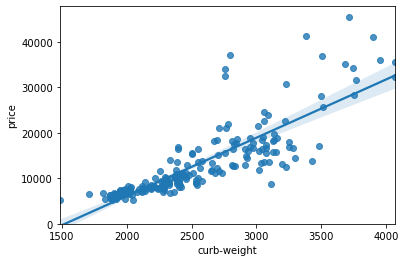

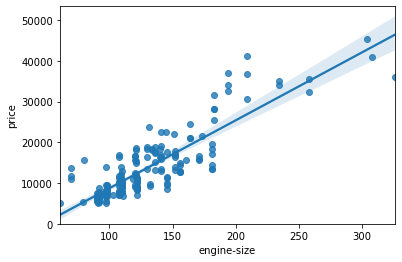

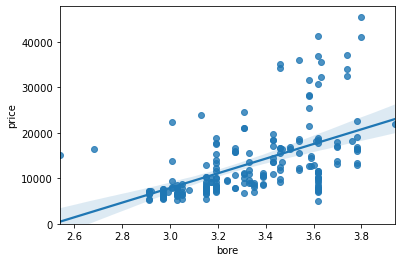

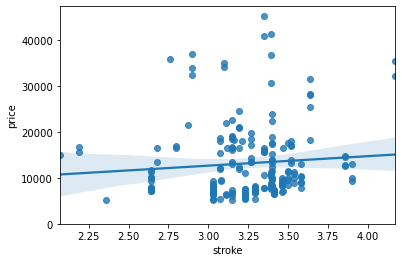

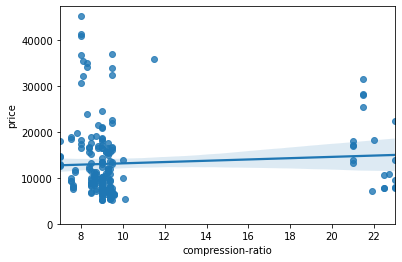

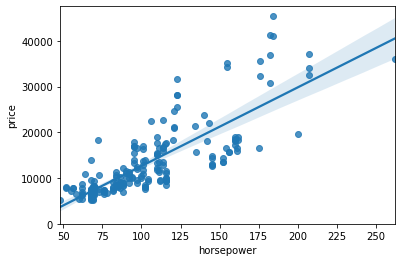

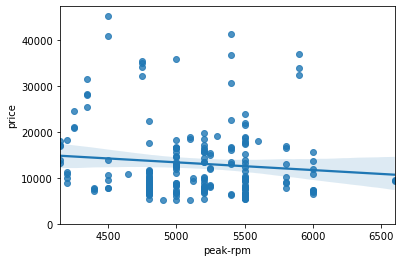

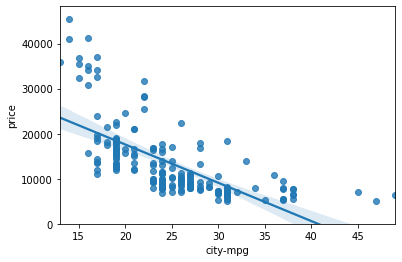

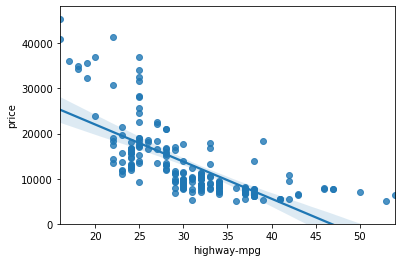

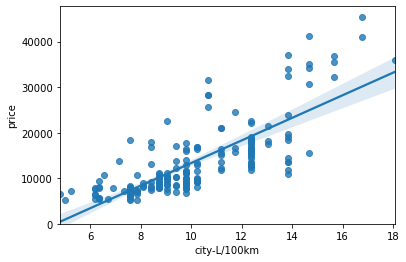

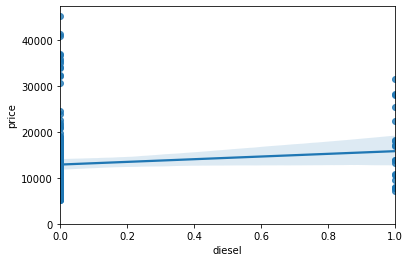

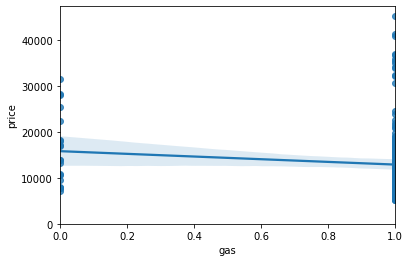

In [11]:
# Engine size as potential predictor variable of price
for col in columns:
    if str(data_cars[col].dtype) in ["float64","int64"] and col != "price":
        sns.regplot(x=col, y="price", data=data_cars)
        plt.ylim(0,)
        plt.show()

## 4. Análisis de patrones en variables nominales usando gráficos de caja (boxplot).

Este tipo de visualizaciones son muy útiles para el mismo objetivo que los gráficos de tendencia, la diferencia es que se usa para variables nominales específicamente, en el caso de querer implementar un análisis ANOVA, estás gráficas nos permiten tener una intuición de lo que se puede esperar de las variables nominales e incluso su interacción. 

<AxesSubplot:xlabel='body-style', ylabel='price'>

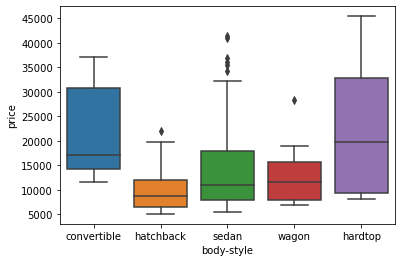

In [12]:
sns.boxplot(x="body-style", y="price", data=data_cars)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

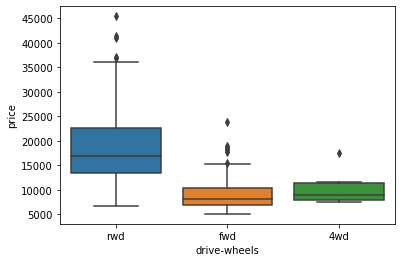

In [13]:
sns.boxplot(x="drive-wheels", y="price", data=data_cars)

## 5. Análisis de correlación usando heatmaps

Finalmente, es importante tener en cuenta descartar variables que sean redundantes entre ellas pues pueden ocasionar problemas de autocorrelación si se incluyen juntas en un modelo de regresión, es por esto que es útil la siguiente visualización.

In [14]:
#Look for correlations in fields
corr = data_cars.corr()
corr.style.background_gradient(cmap='coolwarm')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


#### <em>También se puede segmentar la matriz de correlación entre una lista específica de columnas</em>

In [15]:
data_corr = data_cars[["wheel-base","length","width"]]
corr = data_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,wheel-base,length,width
wheel-base,1.000000,0.876024,0.814507
length,0.876024,1.000000,0.857170
width,0.814507,0.857170,1.000000


## 6. Pandas profiling

In [16]:
#Profile report
#profile = data_cars.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="pandas_profiling.html")


## 7. Identificación y manejo de valores nulos

In [17]:
data_cars.replace("?", np.nan, inplace=True)
data_cars.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [18]:
print("Valores nulos.\n")
for col in columns:
    missing_vals = data_cars[col].isnull().sum()
    if missing_vals != 0:
        print(col, ": ", missing_vals)

Valores nulos.

stroke :  4
horsepower-binned :  1


### En general existen 2 maneras de manejar los datos nulos: 
1. Eliminar datos: eliminar solo la fila o eliminar toda la columna.
2. Reemplazar los datos: reemplazar por media, frecuencia (moda), u otra función.
    

In [23]:
# 1. eliminar la fila.
data_cars_nonulls = data_cars.dropna() #inplace -> important
print("Valores nulos.\n")
for col in columns:
    missing_vals = data_cars_nonulls[col].isnull().sum()
    if missing_vals != 0:
        print(col, ": ", missing_vals)
        
# 2. Reemplazar datos.
#    2.1 Reemplazar por media.
avg_stroke = data_cars["stroke"].astype("float").mean(axis=0)
print(f"The mean of 'stroke' column is {avg_stroke}")
data_cars["stroke"].replace(np.nan, avg_stroke, inplace=True)

#   2.2 Reemplazar por moda.
horse_pwr_topfreq = data_cars['horsepower-binned'].value_counts().idxmax()
print(f"Top frequency of 'horsepower-binned' is: {horse_pwr_topfreq}")
data_cars['horsepower-binned'].replace(np.nan, avg_stroke, inplace=True)


Valores nulos.

The mean of 'stroke' column is 3.256903553299486
Top frequency of 'horsepower-binned' is: Low


## 8. Estandarización de datos.

## 9. Normalización de datos.

## 10. Manejo de datos atípicos.

## 11. Binning data.

En este ejemplo vamos a tomar una variable numérica y la convertiremos en una variable nominal seleccionando unos rangos que nos permitan establecer un orden específico para los datos.

In [25]:
data_cars['horsepower'].describe()

count    201.000000
mean     103.405534
std       37.365700
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

Text(0.5, 1.0, 'horsepower bins')

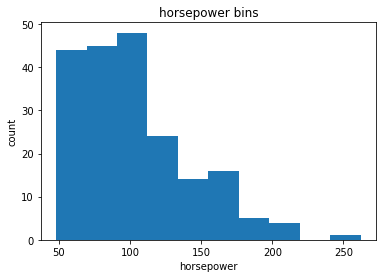

In [28]:
plt.hist(data_cars["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [30]:
bins = np.linspace(min(data_cars["horsepower"]), max(data_cars["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [35]:
group_names = ['Low', 'Medium', 'High']
data_cars['horsepower-binned'] = pd.cut(data_cars['horsepower'], bins, labels=group_names, include_lowest=True )
data_cars[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
9,101.0,Low


In [36]:
data_cars["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

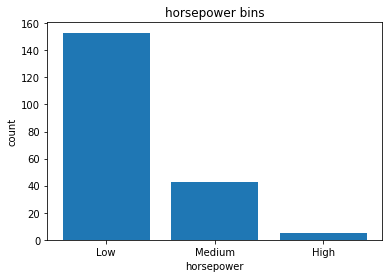

In [39]:
plt.bar(group_names, data_cars["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")